<a href="https://colab.research.google.com/github/MariaLimaS/Desafio_Teorico/blob/main/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Técnico**

Tarefa:
- Identificar o perfil dos clientes que cancelam e aqueles que não cancelam
- Apresentar modelo preditivo para o churn


# **Carregando aquivo dataset.csv**

In [63]:
import pandas as pd

# Carregando a base de dados em um DataFrame do Pandas
df = pd.read_csv('/content/drive/MyDrive/csv_por_churn/dataset.csv')


# **Analisando as classes e os dados**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [65]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Variaveis categóricas**

Muitos modelos de aprensizado de máquinas não podem não podem lidar diretamente com variáveis ​​categóricas,então fez-se a transformação delas em variáveis ​​numéricas antes de serem usadas como entrada para o modelo.

Existem várias razões pelas quais isso é importante:

- Adequação do modelo: muitos modelos, como a regressão linear e regressão logística, são projetados para trabalhar com variáveis ​​numéricas. 

- Flexibilidade de análise: a codificação de variável categórica em variável numérica permite a aplicação de várias técnicas de análise, como gráficos e medidas estatísticas.

- Interpretação: transformar variáveis ​​categóricas em variáveis ​​numéricas pode permitir uma interpretação mais clara dos resultados do modelo. 

- Eficiência computacional: A variável numérica pode melhorar a eficiência computacional do modelo, permitindo que o modelo seja executado mais rapidamente.





# **Adaptando a base de dados para aplicação em modelo**

In [66]:
# Identificando as variáveis categóricas
variaveis_categoricas = ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies' ]

# Aplicando o One-Hot Encoding nas variáveis categóricas
df_encoded = pd.get_dummies(df, columns=variaveis_categoricas)

In [67]:
import numpy as np

#Tranforma as palavras No em 0 e Yes em 1 na base de dados para 
df_encoded = df_encoded.replace({'No': 0, 'Yes': 1})

# escrevendo a nova base de dados em um novo arquivo csv
df_encoded.to_csv('/content/drive/MyDrive/csv_por_churn/datatransf.csv', index=False)

## **Divisão da base de dados**

- Conjunto de treinamento: 60% dos dados originais
- Conjunto de validação: 20% dos dados originais
- Conjunto de teste: 20% dos dados originais




In [68]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/csv_por_churn/datatransf.csv')

display(df)
df.info()

# Separando a coluna de rótulos (classe) da base de dados
X = df.drop(['Churn','MonthlyCharges','TotalCharges'], axis=1)
y = df['Churn']


# Dividindo a base de dados em conjuntos de treinamento e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividindo o conjunto de treinamento e validação em conjuntos separados
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)






,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,1889.5,0,0,...,1,1,0,0,1,0,0,1,0,0
2,0,0,0,2,1,1,53.85,108.15,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,1,1,0,0,1,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.5,0,0,...,1,0,0,1,0,0,1,0,0,1
7039,0,1,1,72,1,1,103.20,7362.9,0,1,...,1,1,0,0,0,0,1,0,0,1
7040,0,1,1,11,0,1,29.60,346.45,0,1,...,0,1,0,0,1,0,0,1,0,0
7041,1,1,0,4,1,1,74.40,306.6,1,0,...,0,1,0,0,1,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7043 non-null   object 
 8   Churn                                    7043 non-null   int64  
 9   gender_Female                            7043 non-null   int64  
 10  gender_Male                              7043 no

# **Análise de balanceamento da base de treinamento**

Uma base de treinamento desbalanceada é aquela em que há uma quantidade significativamente maior de exemplos de uma categoria do que da outra. Esse desequilíbrio pode causar problemas para o modelo de aprendizado de máquina, pois ele pode acabar aprendendo mais sobre a classe majoritária e ter dificuldades em reconhecer exemplos da classe minoritária.


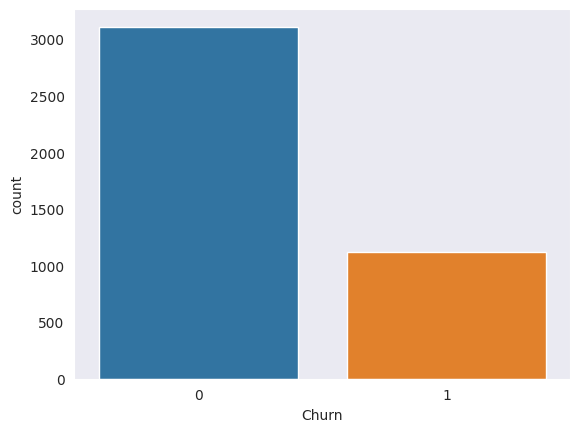

In [46]:
#Análise da base de treinamento original
import seaborn as sns
sns.set_style('dark')
sns.countplot(x=y_train);

In [92]:
#Acuracia do modelo aplicado na base sem balanceamento
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error


# instanciar um objeto de regressão logística
lr = LogisticRegression()

# treinar o modelo com o conjunto de treinamento
lr.fit(X_train, y_train)

# fazer previsões com o conjunto de teste
y_pred = lr.predict(X_test)

# avaliar a acurácia do modelo
acc = accuracy_score(y_test, y_pred)
print("Acurácia:", acc)
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

Acurácia: 0.8183108587650816
Precisão: 0.68
MSE: 0.1816891412349184


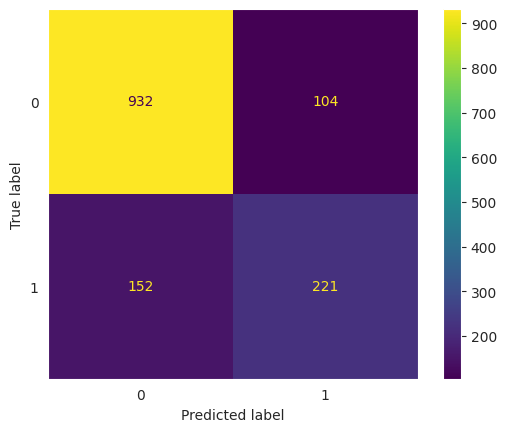

In [101]:
# plotar a matriz de confusão (modelo treinado com base de treinamento desbalanceada )

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_sub = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sub, display_labels=['0', '1'])
disp.plot()
plt.grid(False)
plt.show()

# **Sobreamostragem (oversampling)**
Essa técnica consiste em aumentar o número de exemplos da classe minoritária para equilibrá-la com a classe majoritária

In [53]:
from imblearn.over_sampling import SMOTE

# instanciar um objeto SMOTE para sobreamostragem
smote = SMOTE()

# aplicar a técnica de sobreamostragem no conjunto de treinamento
x_train_sob, y_train_sob = smote.fit_resample(X_train, y_train)

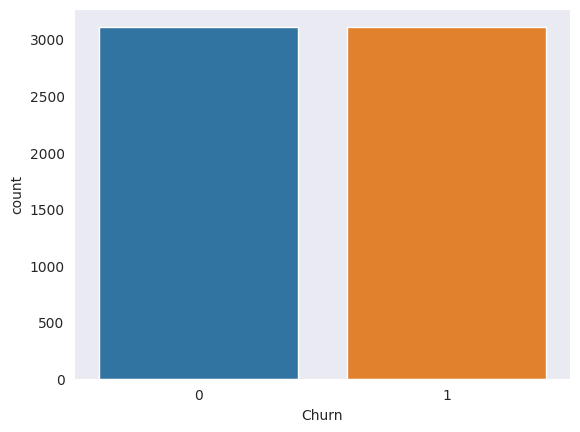

In [54]:
#Análise da base aplicando a técnica de sobreamostragem no conjunto de treinamento
import seaborn as sns
sns.set_style('dark')
sns.countplot(x=y_train_sob);

In [93]:
# instanciar um objeto de regressão logística
lr_sob = LogisticRegression()

# treinar o modelo com o conjunto de treinamento
lr_sob.fit(x_train_sob, y_train_sob)

# fazer previsões com o conjunto de teste
y_pred_sob = lr_sob.predict(X_test)

# avaliar a acurácia do modelo
acc = accuracy_score(y_test, y_pred_sob)
print("Acurácia:", acc)
precision = precision_score(y_test, y_pred_sob)
print("Precisão:", precision)
mse = mean_squared_error(y_test, y_pred_sob)
print("MSE:", mse)

Acurácia: 0.8005677785663591
Precisão: 0.607981220657277
MSE: 0.1994322214336409


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


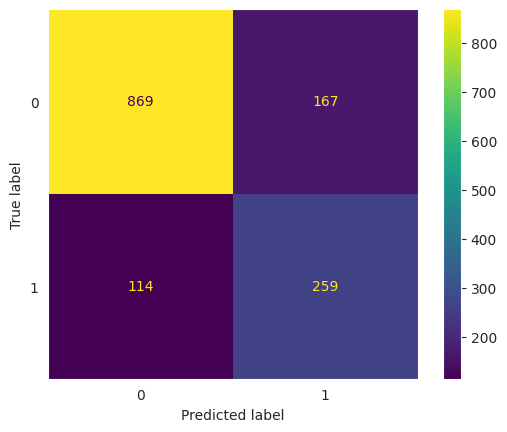

In [100]:
# plotar a matriz de confusão (modelo treinado com base de treinamento balanceada por sobamostragem)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_sub = confusion_matrix(y_test, y_pred_sob)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sub, display_labels=['0', '1'])
disp.plot()
plt.grid(False)
plt.show()

# **Subamostragem (undersampling)**
Essa técnica consiste em reduzir o número de exemplos da classe majoritária para equilibrar com a classe minoritária


In [57]:
from imblearn.under_sampling import RandomUnderSampler

# instanciar um objeto RandomUnderSampler para subamostragem
rus = RandomUnderSampler()

# aplicar a técnica de subamostragem no conjunto de treinamento
x_train_sub, y_train_sub = rus.fit_resample(X_train, y_train)

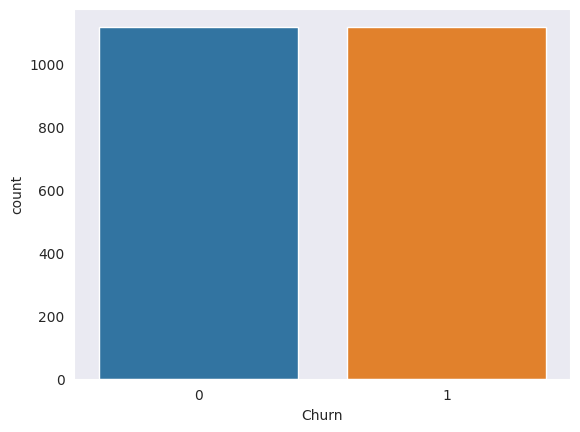

In [58]:
#Análise da base aplicando a técnica de subamostragem no conjunto de treinamento
import seaborn as sns
sns.set_style('dark')
sns.countplot(x=y_train_sub);

In [94]:
# instanciar um objeto de regressão logística
lr_sub = LogisticRegression()

# treinar o modelo com o conjunto de treinamento
lr_sub.fit(x_train_sub, y_train_sub)

# fazer previsões com o conjunto de teste
y_pred_sub = lr_sub.predict(X_test)

# avaliar a acurácia do modelo
acc = accuracy_score(y_test, y_pred_sub)
print("Acurácia:", acc)
precision = precision_score(y_test, y_pred_sub)
print("Precisão:", precision)
mse = mean_squared_error(y_test, y_pred_sub)
print("MSE:", mse)

Acurácia: 0.759403832505323
Precisão: 0.5289115646258503
MSE: 0.24059616749467708


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


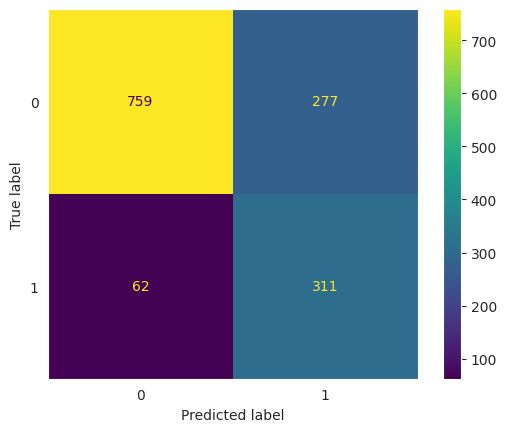

In [99]:
# plotar a matriz de confusão (modelo treinado com base de treinamento balanceada por subamostragem)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_sub = confusion_matrix(y_test, y_pred_sub)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sub, display_labels=['0', '1'])
disp.plot()
plt.grid(False)
plt.show()

# **Hiperparâmetros**

São parâmetros que não são aprendidos pelo modelo de aprendizado de máquina durante o treinamento, mas sim definidos antes do início do processo de treinamento. Eles são usados ​​para controlar como o modelo é treinado e como ele deve se comportar durante a inferência, afetando o desempenho e a capacidade do modelo de generalização.





# **Base de treino desbalanceada**

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir os hiperparâmetros a serem ajustados
parametros = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 15]}

# Instanciar o modelo
modelo = RandomForestClassifier()

# Instanciar o GridSearchCV para ajuste de hiperparâmetros
ajuste_hiperparametros = GridSearchCV(modelo, parametros, cv=5)

# Ajustar o modelo com o conjunto de treino e os hiperparâmetros selecionados com a base de treinamento desbalanceada
ajuste_hiperparametros.fit(X_train, y_train)

# Avaliar o desempenho do modelo com os hiperparâmetros ajustados no conjunto de validação
desempenho_val = ajuste_hiperparametros.score(X_val, y_val)

# Avaliar o desempenho final do modelo no conjunto de testes
desempenho_teste = ajuste_hiperparametros.score(X_test, y_test)

print(f"Desempenho no conjunto de validação: {desempenho_val}")
print(f"Desempenho no conjunto de testes: {desempenho_teste}")

Desempenho no conjunto de validação: 0.7899219304471257
Desempenho no conjunto de testes: 0.8026969481902059


# **Base de treino balanceada - sobreamostragem**

In [136]:
# Ajustar o modelo com o conjunto de treino e os hiperparâmetros selecionados com a base de treinamento balanceada com sobamostragem
ajuste_hiperparametros.fit(x_train_sob, y_train_sob)

# Avaliar o desempenho do modelo com os hiperparâmetros ajustados no conjunto de validação
desempenho_val = ajuste_hiperparametros.score(X_val, y_val)

# Avaliar o desempenho final do modelo no conjunto de testes
desempenho_teste = ajuste_hiperparametros.score(X_test, y_test)

print(f"Desempenho no conjunto de validação: {desempenho_val}")
print(f"Desempenho no conjunto de testes: {desempenho_teste}")

Desempenho no conjunto de validação: 0.7629524485450674
Desempenho no conjunto de testes: 0.7792760823278921


# **Base de treino - Subamostragem**

In [137]:
# Ajustar o modelo com o conjunto de treino e os hiperparâmetros selecionados com a base balanceada com subamostragem
ajuste_hiperparametros.fit(x_train_sub, y_train_sub)

# Avaliar o desempenho do modelo com os hiperparâmetros ajustados no conjunto de validação
desempenho_val = ajuste_hiperparametros.score(X_val, y_val)

# Avaliar o desempenho final do modelo no conjunto de testes
desempenho_teste = ajuste_hiperparametros.score(X_test, y_test)

print(f"Desempenho no conjunto de validação: {desempenho_val}")
print(f"Desempenho no conjunto de testes: {desempenho_teste}")

Desempenho no conjunto de validação: 0.730305180979418
Desempenho no conjunto de testes: 0.7444996451383961


# **Conclusão**

Os resultados mostram que a acurácia é relativamente alta em todos os conjuntos de dados, mas a precisão e o MSE variam de acordo com o método de balanceamento e o conjunto de dados usados.

O uso de subamostragem e sobreamostragem para balancear a base de treinamento não parece ter melhorado o desempenho geral do modelo, com uma leve queda na precisão e aumento no MSE em alguns casos.

A aplicação do GridSearchCV com RandomForestClassifier mostrou resultados semelhantes, com desempenho um pouco melhor na base de dados desbalanceada em comparação com as bases balanceadas.

É importante notar que a avaliação do desempenho no conjunto de validação e no conjunto de teste é fundamental para garantir que o modelo esteja generalizando bem e não esteja superajustado aos dados de treinamento. No geral, os resultados sugerem que, embora a acurácia seja alta